# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
response = requests.get(url)
print(response)

<Response [200]>


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [36]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    if row_data:
        rows_list.append(row_data)
        
# Print the list of rows
print(rows_list)


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [37]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns_list = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

weather_df = pd.DataFrame(rows_list, columns= columns_list)

In [38]:
# Confirm DataFrame was created successfully
weather_df.tail(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1857,1886,2018-02-18,1968,131,5,-76.0,732.0
1858,1887,2018-02-19,1969,131,5,-76.0,732.0
1859,1888,2018-02-20,1970,132,5,-77.0,731.0
1860,1890,2018-02-21,1971,132,5,-78.0,731.0
1861,1891,2018-02-22,1972,133,5,-78.0,730.0
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [40]:
# Change data types for data analysis
weather_df['id'] = weather_df['id'].astype(int)
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype(int)
weather_df['ls'] = weather_df['ls'].astype(int)
weather_df['month'] = weather_df['month'].astype(int)
weather_df['min_temp'] = weather_df['min_temp'].astype(float)
weather_df['pressure'] = weather_df['pressure'].astype(float)

In [41]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [42]:
# 1. How many months are there on Mars?
total_months = weather_df['month'].nunique()
print(f" There are {total_months} months on Mars.")

 There are 12 months on Mars.


In [43]:
# 2. How many Martian days' worth of data are there?
martian_days = (weather_df['sol'].nunique())
print(f"There are {martian_days} days' worth of data.")

There are 1867 days' worth of data.


In [44]:
# 3. What is the average low temperature by month?

#calculate the average low temperature by month
avg_low_temp_by_month = round(weather_df.groupby('month')['min_temp'].mean(), 2)
print(f"The average low temperature by month is {avg_low_temp_by_month}")

The average low temperature by month is month
1    -77.16
2    -79.93
3    -83.31
4    -82.75
5    -79.31
6    -75.30
7    -72.28
8    -68.38
9    -69.17
10   -71.98
11   -71.99
12   -74.45
Name: min_temp, dtype: float64


In [45]:
# Plot the average temperature by month
avg_low_temp_df = pd.DataFrame(avg_low_temp_by_month)
avg_low_temp_df

,min_temp
month,
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31
6,-75.30
7,-72.28
8,-68.38
9,-69.17


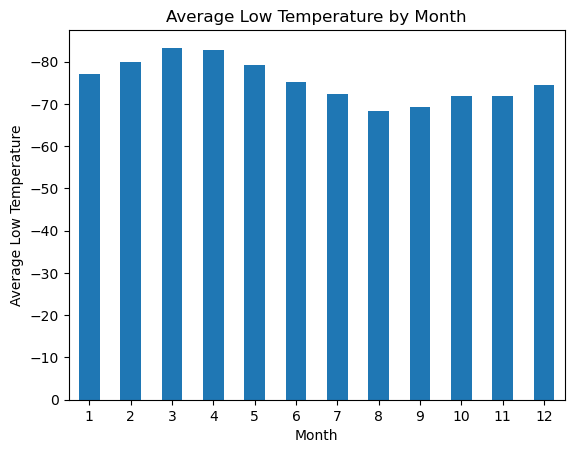

In [46]:
#comment and explain why this plot (y-axis) and add labels and legend
fig, ax = plt.subplots()

avg_low_temp_by_month.plot.bar(xlabel='Month', ylabel='Average Low Temperature', rot=0)
ax.invert_yaxis()

# add a title to the plot
ax.set_title('Average Low Temperature by Month')

# display the plot
plt.show()

In [47]:
# List and sort months (identified by indexes) from coldest to hottest
monthly_temp_asc = avg_low_temp_by_month.sort_values(ascending=False)
monthly_temp_asc

month
8    -68.38
9    -69.17
10   -71.98
11   -71.99
7    -72.28
12   -74.45
6    -75.30
1    -77.16
5    -79.31
2    -79.93
4    -82.75
3    -83.31
Name: min_temp, dtype: float64

In [48]:
# Identify the coldest and hottest months in Curiosity's location

# print coldest month - note that month is identified by its index 
coldest_month = monthly_temp_asc.index[-1]

print(f"The {coldest_month}th month is the coldest month in Curiosity's location.")

The 3th month is the coldest month in Curiosity's location.


In [49]:
# print hottest month - note that month is identified by its index 
hottest_month = monthly_temp_asc.index[0]

print(f"The {hottest_month}th month is the hottest month in Curiosity's location.")

The 8th month is the hottest month in Curiosity's location.


In [50]:
# 4. Average pressure by Martian month
avg_pressure_by_month = round(weather_df.groupby('month')['pressure'].mean(), 2)
avg_pressure_by_month

month
1     862.49
2     889.46
3     877.32
4     806.33
5     748.56
6     745.05
7     795.11
8     873.83
9     913.31
10    887.31
11    857.01
12    842.16
Name: pressure, dtype: float64

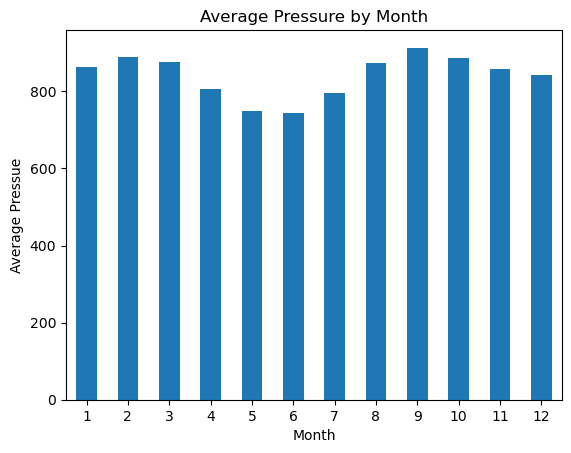

In [51]:
# Plot the average pressure by month
fig, ax = plt.subplots()

avg_pressure_by_month.plot.bar(xlabel = 'Month', ylabel= 'Average Pressue', rot=0)

# add a title to the plot
ax.set_title('Average Pressure by Month')

# display the plot
plt.show()

In [52]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# find the original longitude of the sun
og_sun_long = weather_df['ls'].loc[0]
og_sun_long

155

In [53]:
#find rows with longitudes equal to the original longitude
equal_long = weather_df.loc[weather_df['ls']==og_sun_long]
equal_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [54]:
#calculate terrestials days in martian year by finding the difference between the terrestial date of two ls(where ls=155)
first_long_date = equal_long['terrestrial_date'].loc[0]
date_after_martian_year = equal_long['terrestrial_date'].iloc[1]
days_in_martian_year = date_after_martian_year - first_long_date

#print result
print(f"There are {days_in_martian_year} terrestrial (Earth) days in one Martian year.")

There are 686 days 00:00:00 terrestrial (Earth) days in one Martian year.


<AxesSubplot:>

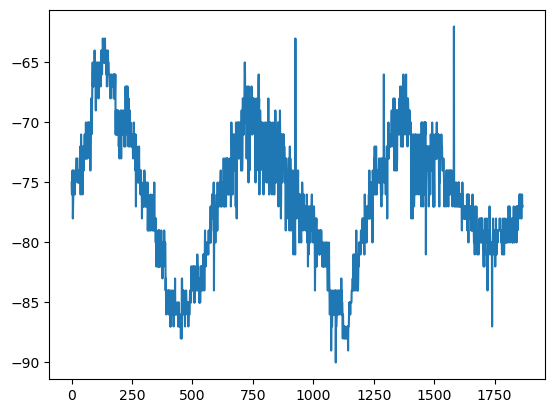

In [55]:
weather_df['min_temp'].plot()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [56]:
# Write the data to a CSV
weather_df.to_csv('mars_weather.csv', index=False)

In [57]:
browser.quit()